In [32]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os

import libpysal as lps
import pysal.explore as ps_explore
import pysal.model as ps_model
from splot.esda import moran_facet,moran_scatterplot,lisa_cluster,plot_local_autocorrelation,plot_moran

# Test

In [56]:
cb_emissions_h3Res10_gdf = gpd.read_file(r'/Volumes/External/gitProj/xanderPeng/data/clean/freightEmissions/shp/cb/130/h3Res10/h3Res10_dropna.shp')
cb_emissions_h3Res10_gdf

,h3_index,Benzene,Pb,PN,SO2,CO,PM2_5,FC,N2O,air_qualit,...,PM,FC_MJ,NH3,CO2_rep,PM2_5_non_,NMHC,PM_non_exh,HC,NOx,geometry
0,8a1fa47a191ffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004346,...,0.0,0.016163,0.0,0.0,0.001521,0.0,0.002825,0.0,0.0,"POLYGON ((172879.747 175244.210, 172948.270 17..."
1,8a1fa47a0257fff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007071,...,0.0,0.026298,0.0,0.0,0.002475,0.0,0.004596,0.0,0.0,"POLYGON ((172113.226 173719.711, 172181.752 17..."
2,8a1fa47a1887fff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017190,...,0.0,0.064912,0.0,0.0,0.006016,0.0,0.011173,0.0,0.0,"POLYGON ((172911.124 174813.711, 172979.649 17..."
3,8a1fa47a19b7fff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060470,...,0.0,0.224880,0.0,0.0,0.021164,0.0,0.039305,0.0,0.0,"POLYGON ((172590.559 175059.972, 172659.082 17..."
4,8a1fa47a02effff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015855,...,0.0,0.058965,0.0,0.0,0.005549,0.0,0.010306,0.0,0.0,"POLYGON ((172151.554 173608.968, 172220.080 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,8a1fa47a1507fff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011658,...,0.0,0.043353,0.0,0.0,0.004080,0.0,0.007577,0.0,0.0,"POLYGON ((172524.383 173891.545, 172592.910 17..."
320,8a1fa47a192ffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024824,...,0.0,0.092319,0.0,0.0,0.008689,0.0,0.016136,0.0,0.0,"POLYGON ((172925.033 175453.251, 172993.556 17..."
321,8a1fa47a1637fff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006813,...,0.0,0.025684,0.0,0.0,0.002385,0.0,0.004428,0.0,0.0,"POLYGON ((173454.797 173583.161, 173523.329 17..."
322,8a1fa47a1897fff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023549,...,0.0,0.089482,0.0,0.0,0.008242,0.0,0.015307,0.0,0.0,"POLYGON ((172827.503 174715.386, 172896.028 17..."


## Test on Moran I

In [57]:
spatial_weights = lps.weights.Queen.from_dataframe(cb_emissions_h3Res10_gdf)
spatial_weights.transform = 'r'
spatial_weights

/var/folders/y9/y0gddk2s3s3gl_8567n1mwnh0000gn/T/ipykernel_86654/2287151486.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  spatial_weights = lps.weights.Queen.from_dataframe(cb_emissions_h3Res10_gdf)


In [58]:
moran_I = ps_explore.esda.Moran(cb_emissions_h3Res10_gdf['air_qualit'], spatial_weights)
moran_I

In [59]:
print(f"Moran's I: {moran_I.I}")
print(f'P-Value (normality) {moran_I.p_norm}')
print(f"P-value (randomization): {moran_I.p_rand}")
print(f"P-value (permutation): {moran_I.p_sim}")
print(f"Z-score (normality assumption): {moran_I.z_norm}")
print(f"Z-score (randomization assumption): {moran_I.z_rand}")
print(f"Z-score (permutation test): {moran_I.z_sim}")

Moran's I: 0.551571806097681
P-Value (normality) 2.254717295012195e-56
P-value (randomization): 2.4477947971641977e-59
P-value (permutation): 0.001
Z-score (normality assumption): 15.82028444486354
Z-score (randomization assumption): 16.24438609908998
Z-score (permutation test): 16.3759549510516


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.55', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.55)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

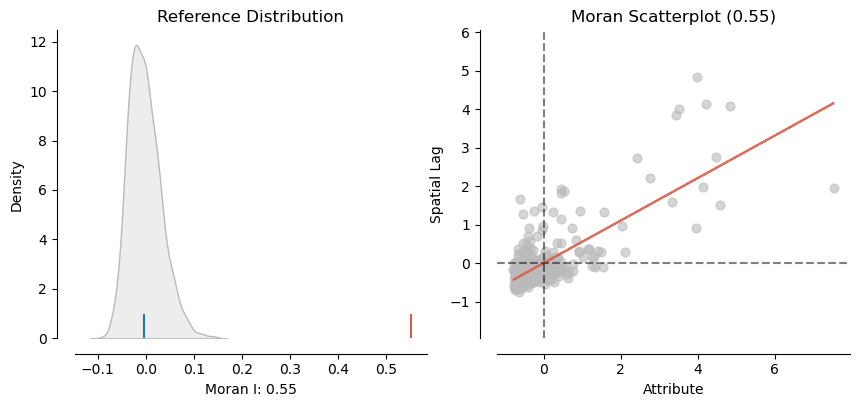

In [60]:
plot_moran(moran_I)

### Local Moran I

In [61]:
lisa = ps_explore.esda.Moran_Local(cb_emissions_h3Res10_gdf['air_qualit'], spatial_weights)
lisa

In [62]:
print(f"Local Moran's I: {lisa.Is}")  # 每个单元的局部莫兰指数
print(f"P-values: {lisa.p_sim}")      # 置换检验的 P 值

Local Moran's I: [ 9.32272515e-02  6.32415463e-02  1.80814701e-02  6.61922940e+00
 -1.45125142e-02 -4.05214939e-03  4.16853810e-03 -4.23632331e-02
  5.85514393e-02  1.65806764e-01  1.70040789e-01  1.00312272e-02
 -1.56344909e-01  1.63269979e-01  2.97436524e-01 -6.11609377e-02
  1.16881978e-01 -1.25115231e-01  2.12231821e-01  8.71607070e-02
  1.92327692e+01  6.96356773e-02  4.30472141e-01  1.40685838e-01
  1.70554574e-01 -3.99918768e-02 -6.10171434e-02 -2.55375331e-02
  1.51586879e-02  2.21569880e-01 -7.38201590e-02  1.02805332e-01
 -2.73632201e-03  1.14551646e-02  5.51160969e-02  4.01791467e-02
  3.23709885e-01  1.31654206e-01  6.62291271e-02  1.73376605e+01
  2.68359957e-01  5.33545146e-02  4.28474760e-02  1.97641816e+01
 -2.61566137e-02  6.02039488e-02 -3.64064436e-02  2.82530294e-01
 -2.15759650e-02  1.56291115e-01  5.30580591e+00  2.29561152e-02
 -1.65819441e-02  1.41204324e-03  2.76807368e-02  1.40753960e-01
  7.19518551e-02  8.17789911e+00  1.34312811e-02 -6.24080486e-03
  4.4002

(<Figure size 900x900 with 1 Axes>, <Axes: >)

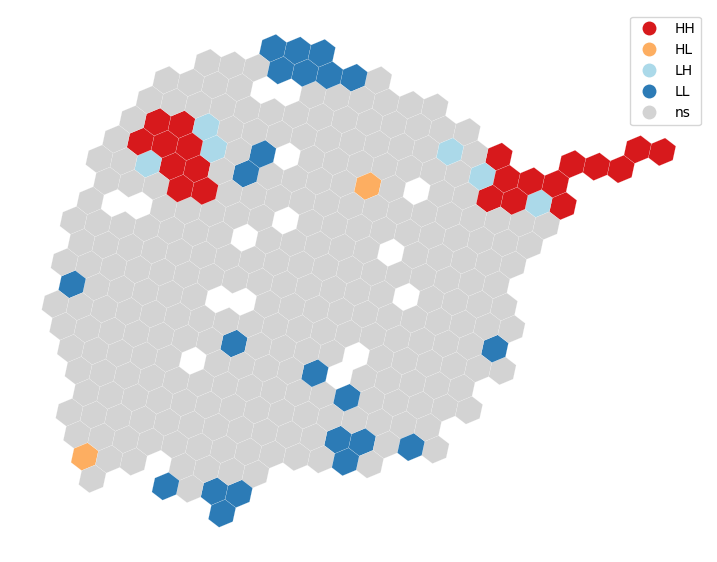

In [63]:
lisa_cluster(lisa, cb_emissions_h3Res10_gdf, p=0.05, figsize=(9, 9))

(<Figure size 1500x400 with 3 Axes>,
 array([<Axes: title={'center': 'Moran Local Scatterplot'}, xlabel='Attribute', ylabel='Spatial Lag'>,
        <Axes: >, <Axes: >], dtype=object))

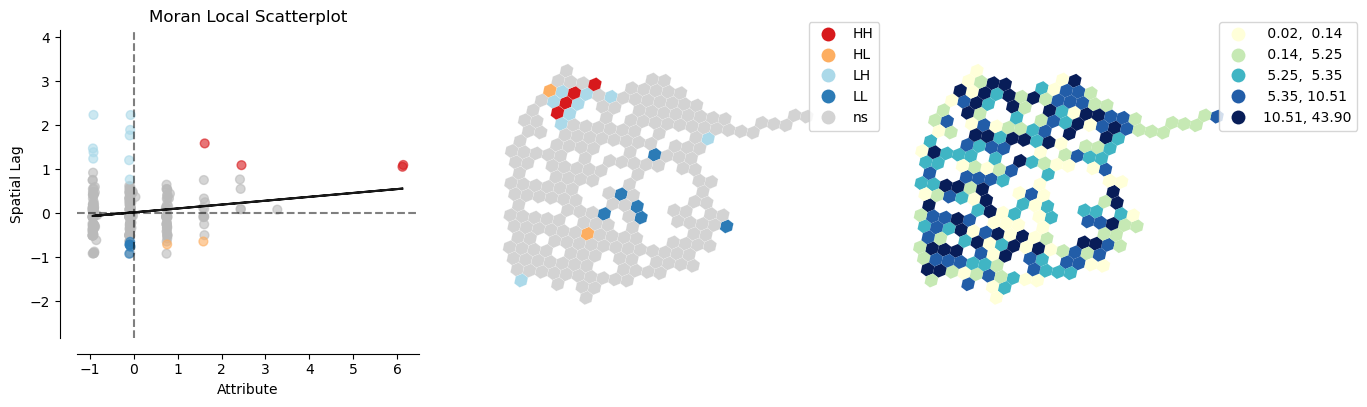

In [44]:
plot_local_autocorrelation(lisa, cb_emissions_h3Res10_gdf, 'air_qualit')